In [1]:
import numpy as np
from scipy.optimize import nnls
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
data_path = '/Users/dellacc/Library/CloudStorage/OneDrive-TheFrancisCrickInstitute/cajal comp neuroscience 2024/Project - Palmigiano/Data_cell_types_small_size.mat'
data = loadmat(data_path)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
def phi(x, a =1, k = 2):
    return a * x**k

def phi_inv(y, a = 1, k = 2):
    return (y/a)**(1/k)

In [11]:
print(data.keys())
print(data['pyr'].shape)
print(data['pv'].shape)
print(data['sst'].shape)
print(data['vip'].shape)
print(data['contrast'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'pyr', 'pv', 'sst', 'vip', 'contrast'])
(2664, 6)
(57, 6)
(203, 6)
(169, 6)
(1, 6)


In [6]:
# N_alfa = 100
# n_pop = 2
# N_beta = 100

# A = np.random.uniform(low = 0, high = 10, size=(N_alfa+N_beta +2, N_alfa+N_beta +2))
# #add a column of ones at the end
# A[:,-1] = 1
# rates_alfa = np.random.uniform(low = 0, high = 10, size=N_alfa+N_beta+2)
# phi_inv_rates_alfa = phi_inv(rates_alfa)


In [4]:
E = data['pyr']
PV = data['pv']
SOM = data['sst']
VIP = data['vip']
I = data['contrast']

# means
E_mean = np.mean(E, axis = 0)
PV_mean = np.mean(PV, axis = 0)
SOM_mean = np.mean(SOM, axis = 0)
VIP_mean = np.mean(VIP, axis = 0)

In [30]:
print(E_mean.shape)
print(PV_mean.shape)
print(SOM_mean.shape)
print(VIP_mean.shape)
print(I.shape)  
print(E_mean)

(6,)
(6,)
(6,)
(6,)
(1, 6)
[0.21634893 0.22840137 0.28256743 0.3946991  0.51465092 0.59149586]


In [7]:
#matrix A has rows with rates of the four cells across the 6 conditions
A = np.concatenate((E_mean[:,np.newaxis], -PV_mean[:,np.newaxis], -SOM_mean[:,np.newaxis], -VIP_mean[:,np.newaxis], I[0,:][:,np.newaxis]/100), axis = 1)
print(A.shape)
ones = np.ones_like(I)
print(ones.shape)
A = np.concatenate((A, ones[0,:][:,np.newaxis]), axis = 1)
print(A.shape)


(6, 5)
(1, 6)
(6, 6)


In [58]:
print(E_mean)

[0.21634893 0.22840137 0.28256743 0.3946991  0.51465092 0.59149586]


In [8]:
print(A)

[[ 0.21634893 -0.20270902 -0.10236657 -0.39859679  0.          1.        ]
 [ 0.22840137 -0.24957409 -0.12339172 -0.50254461  0.06        1.        ]
 [ 0.28256743 -0.2955943  -0.1086949  -0.57907857  0.12        1.        ]
 [ 0.3946991  -0.4072691  -0.15047143 -0.63834552  0.25        1.        ]
 [ 0.51465092 -0.5950653  -0.26108373 -0.48090594  0.5         1.        ]
 [ 0.59149586 -0.73559046 -0.55200543 -0.40052857  1.          1.        ]]


In [9]:
phi_inv_E = phi_inv(E_mean)
#solve nnls Ax = y
x_E = nnls(A, phi_inv_E)[0]

In [44]:
print(x)

[0.82162861 0.         0.         0.07707845 0.         0.25456491]


In [10]:
phi_inv_PV = phi_inv(PV_mean)
x_PV = nnls(A, phi_inv_PV)[0]

phi_inv_SOM = phi_inv(SOM_mean)
Anc = A.copy()
Anc[:,-2] = 0
x_SOM = nnls(Anc, phi_inv_SOM)[0]

phi_inv_VIP = phi_inv(VIP_mean)
x_VIP = nnls(Anc, phi_inv_VIP)[0]

In [101]:
print(x_E)
print(x_PV)
print(x_SOM)
print(x_VIP)

[0.85019137 0.12046141 0.32576243 0.         0.00194141 0.34042947]
[0.6267717  0.         0.49034239 0.         0.00383783 0.37665983]
[0.         0.07490178 0.         0.16874326 0.00456467 0.40903146]
[0.         1.18121546 3.13304594 0.         0.0200315  1.22724314]


In [11]:
weight_matrix = np.concatenate((x_E, x_PV, x_SOM, x_VIP))
weight_matrix = weight_matrix.reshape(4,6)

In [140]:
print(weight_matrix)
print(weight_matrix.shape)

[[0.85019137 0.12046141 0.32576243 0.         0.00194141 0.34042947]
 [0.6267717  0.         0.49034239 0.         0.00383783 0.37665983]
 [0.90247262 0.         0.         0.51539458 0.         0.3630127 ]
 [0.61244814 0.13455959 0.52075599 0.         0.         0.64538931]]
(4, 6)


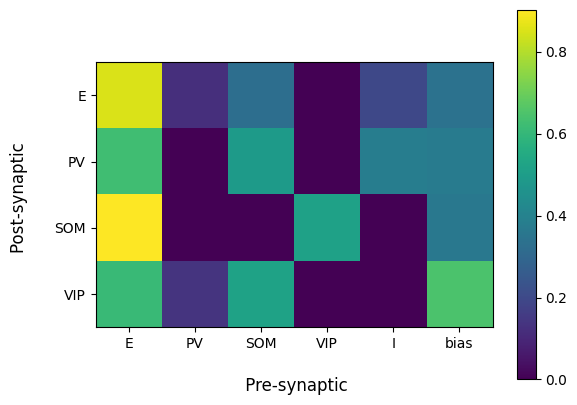

In [27]:
plt.imshow(weight_matrix)
plt.xticks(np.arange(6), ['E', 'PV', 'SOM', 'VIP', 'I', 'bias'], fontsize = 10)
plt.yticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'], fontsize = 10)
plt.xlabel('\n Pre-synaptic', fontsize = 12)
plt.ylabel('Post-synaptic \n', fontsize = 12)
plt.colorbar()
plt.show()

In [22]:
print(weight_matrix)

[[0.85019137 0.12046141 0.32576243 0.         0.19414135 0.34042947]
 [0.6267717  0.         0.49034239 0.         0.38378296 0.37665983]
 [0.90247262 0.         0.         0.51539458 0.         0.3630127 ]
 [0.61244814 0.13455959 0.52075599 0.         0.         0.64538931]]


/var/folders/nw/5r29xbqs6jx_h23mjxw6ykm8qhq097/T/ipykernel_20490/249215705.py:3: RuntimeWarning: divide by zero encountered in log
  weight_matrix_norm = np.log(weight_matrix[:,0:4]/w_ep)


Text(0, 0.5, 'to')

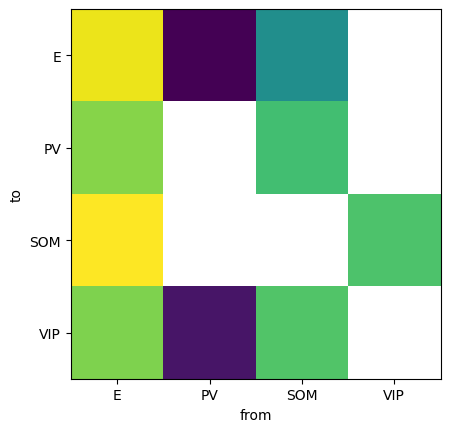

In [114]:
# get the weight matrix as log(w/w_ep)
w_ep = weight_matrix[0,1]
weight_matrix_norm = np.log(weight_matrix[:,0:4]/w_ep)
plt.imshow(weight_matrix_norm)
plt.xticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'])
plt.yticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'])
plt.xlabel('from')
plt.ylabel('to')

In [14]:
#sample some rates for E
rates_E = phi(A @ x_E)
rates_PV = phi(A @ x_PV)
rates_SOM = phi(Anc @ x_SOM)
rates_VIP = phi(Anc @ x_VIP)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


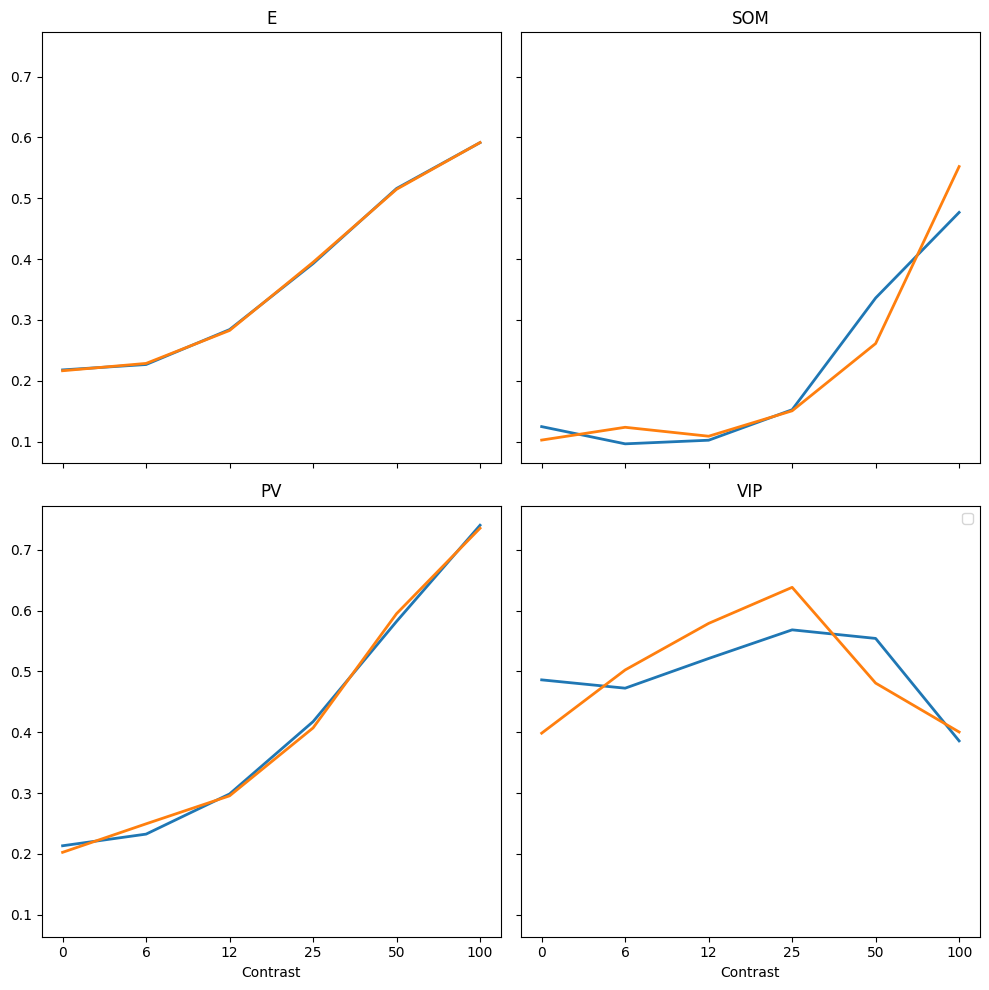

In [33]:
ax, fig = plt.subplots(2, 2, sharey = True, figsize = (10,10), sharex = True)
fig[0,0].plot(rates_E, linewidth = 2, label = 'Predicted')
fig[0,0].plot(E_mean, linewidth = 2,  label = 'True',)
fig[0,0].set_title('E')
fig[1,0].plot(rates_PV, linewidth = 2)
fig[1,0].plot(PV_mean, linewidth = 2)
fig[1,0].set_title('PV')
fig[0,1].plot(rates_SOM, linewidth = 2)
fig[0,1].plot(SOM_mean, linewidth = 2)
fig[0,1].set_title('SOM')
fig[1,1].plot(rates_VIP, linewidth = 2)
fig[1,1].plot(VIP_mean,  linewidth = 2)
fig[1,1].set_title('VIP')
fig[1,0].set_xlabel('Contrast')
fig[1,1].set_xlabel('Contrast')
fig[1,1].set_xticks(ticks = np.arange(6), labels=['0', '6', '12', '25', '50', '100'])
fig[1,0].set_xticks(ticks = np.arange(6), labels=['0', '6', '12', '25', '50', '100'])
plt.tight_layout()
plt.legend()
plt.show()



In [55]:
print(rates_E)

[0.21441216 0.23132384 0.28234863 0.39446396 0.51048783 0.59509955]


In [56]:
print(E_mean)

[0.21634893 0.22840137 0.28256743 0.3946991  0.51465092 0.59149586]


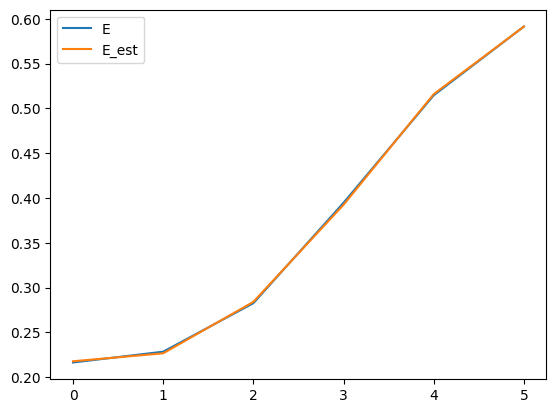

In [106]:
plt.plot(E_mean, label = 'E')
plt.plot(rates_E, label = 'E_est')
plt.legend()
plt.show()

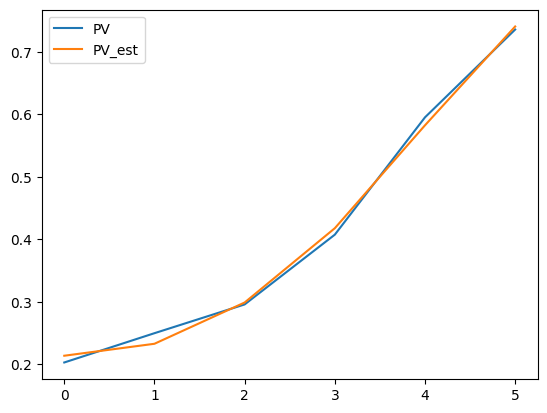

In [107]:
rates_PV = phi(A @ x_PV)
plt.plot(PV_mean, label = 'PV')
plt.plot(rates_PV, label = 'PV_est')
plt.legend()
plt.show()

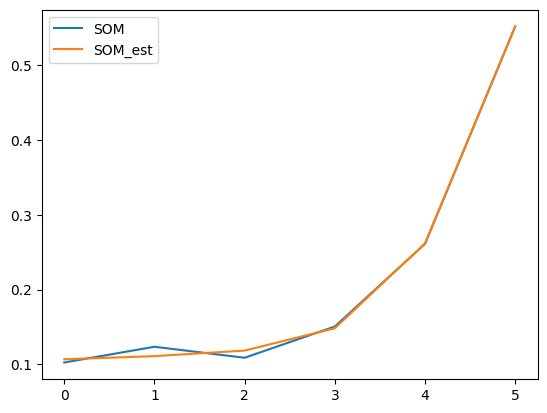

In [108]:
rates_SOM = phi(A @ x_SOM)
plt.plot(SOM_mean, label = 'SOM')
plt.plot(rates_SOM, label = 'SOM_est')
plt.legend()
plt.show()

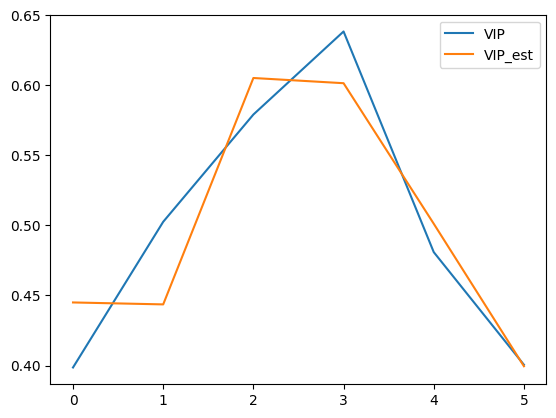

In [109]:
rates_VIP = phi(A @ x_VIP)
plt.plot(VIP_mean, label = 'VIP')
plt.plot(rates_VIP, label = 'VIP_est')
plt.legend()
plt.show()

## try sampling random neurons

In [133]:
ne = E.shape[0]
npv = PV.shape[0]
nsom = SOM.shape[0]
nvip = VIP.shape[0]
min_neurons = min(ne, npv, nsom, nvip)
neurons = [i for i in range(min_neurons)]
weights = []
for n in neurons:
    neuron_e = E[n,:]
    neuron_pv = PV[n,:]
    neuron_som = SOM[n,:]
    neuron_vip = VIP[n,:]

    A = np.concatenate((neuron_e[:,np.newaxis], -neuron_pv[:,np.newaxis], -neuron_som[:,np.newaxis], -neuron_vip[:,np.newaxis], I[0,:][:,np.newaxis]), axis = 1)
    ones = np.ones_like(I)
    A = np.concatenate((A, ones[0,:][:,np.newaxis]), axis = 1)

    phi_inv_neuron_e = phi_inv(neuron_e)
    x_neuron_e = nnls(A, phi_inv_neuron_e)[0]
    phi_inv_neuron_pv = phi_inv(neuron_pv)
    x_neuron_pv = nnls(A, phi_inv_neuron_pv)[0]
    phi_inv_neuron_som = phi_inv(neuron_som)
    Anc = A.copy()
    Anc[:,-2] = 0
    x_neuron_som = nnls(Anc, phi_inv_neuron_som)[0]
    phi_inv_neuron_vip = phi_inv(neuron_vip)
    x_neuron_vip = nnls(Anc, phi_inv_neuron_vip)[0]

    weight_matrix = np.concatenate((x_neuron_e, x_neuron_pv, x_neuron_som, x_neuron_vip))
    weight_matrix = weight_matrix.reshape(4,6)
    weights.append(weight_matrix)

#average the weights
weights = np.array(weights)
weights_avg = np.mean(weights, axis = 0)

#scale the weights
w_ep = weights_avg[0,1]
weights_avg_norm = np.log(weights_avg[:,0:4]/w_ep)

/var/folders/nw/5r29xbqs6jx_h23mjxw6ykm8qhq097/T/ipykernel_20490/3420743792.py:39: RuntimeWarning: divide by zero encountered in log
  weights_avg_norm = np.log(weights_avg[:,0:4]/w_ep)


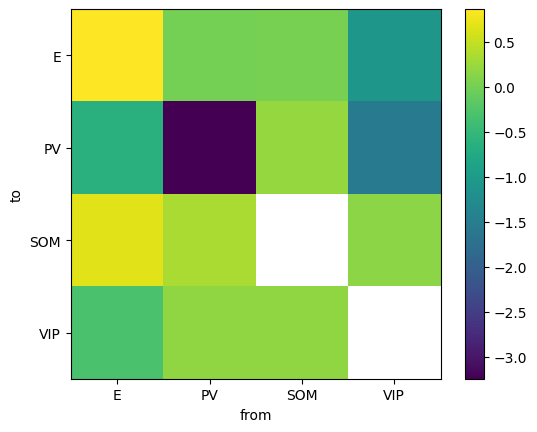

In [134]:
plt.imshow(weights_avg_norm)
plt.xticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'])
plt.yticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'])
plt.xlabel('from')
plt.ylabel('to')
plt.colorbar()
plt.show()

### compute Jacobian of the network - stability analysis

In [568]:
def phi_prime(x):
    return 2*x

def get_jacobian(rates, weights, taus = np.ones(4)):
    n_pop = weights.shape[0]
    phi_prime_mat = np.diag(phi_prime(rates))
    T_inv = np.diag(1/taus)
    #get the anti-diagonal matrix
    # print(phi_prime_mat)
    # phi_prime_mat = np.flipud(phi_prime_mat)
    # print(phi_prime_mat)
    # print(phi_prime_mat.shape)
    # print(weights.shape)
    jacobian = T_inv@((phi_prime_mat @ weights) - np.eye(n_pop))
    return jacobian 

def get_minor_jacobian(jacobian, index):
    n = jacobian.shape[0]
    return np.delete(np.delete(jacobian, index, axis = 0), index, axis = 1)

def get_weight_matrix_sign(weights):
    #put minus in front ov comlumns 1,2,3
    weights_sign = weights.copy()
    weights_sign[:,1:4] = -weights_sign[:,1:4]
    return weights_sign

In [569]:
def get_rates(rates_0, weights, contrast, delta_h = 0, delta_t=0.1, max_iter=5000, taus = np.ones(4)):
    #euler method
    rates = rates_0.copy()
    rates = np.concatenate((rates, [contrast+delta_h, 1]))
    print('rates_beginning: ', rates)
    # print(rates.shape)
    # print(weights.shape)
    for i in range(max_iter):
        delta_r = delta_t * (-rates[0:4] + phi(weights @ rates))/taus
        rates_new = rates[0:4] + delta_r
        # print(rates_new)
        if np.all(np.abs(delta_r))< 1e-12:
            break
        rates = np.concatenate((rates_new, [contrast+delta_h, 1]))
    print(rates)
    return rates

In [570]:
print(E_mean)

[0.21634893 0.22840137 0.28256743 0.3946991  0.51465092 0.59149586]


In [571]:
# rates_I_0 = [E_mean[0], PV_mean[0], SOM_mean[0], VIP_mean[0]]
rates_I_0 = [rates_E[2], rates_PV[2], rates_SOM[2], rates_VIP[2]]
rates_I_0 = np.array(rates_I_0)
print(rates_I_0)

[0.28403187 0.29868557 0.10212378 0.52138311]


In [598]:
print(weight_matrix)
weight_matrix_sign = get_weight_matrix_sign(weight_matrix)
print(weight_matrix_sign)

[[0.85019137 0.12046141 0.32576243 0.         0.19414135 0.34042947]
 [0.6267717  0.         0.49034239 0.         0.38378296 0.37665983]
 [0.90247262 0.         0.         0.51539458 0.         0.3630127 ]
 [0.61244814 0.13455959 0.52075599 0.         0.         0.64538931]]
[[ 0.85019137 -0.12046141 -0.32576243 -0.          0.19414135  0.34042947]
 [ 0.6267717  -0.         -0.49034239 -0.          0.38378296  0.37665983]
 [ 0.90247262 -0.         -0.         -0.51539458  0.          0.3630127 ]
 [ 0.61244814 -0.13455959 -0.52075599 -0.          0.          0.64538931]]


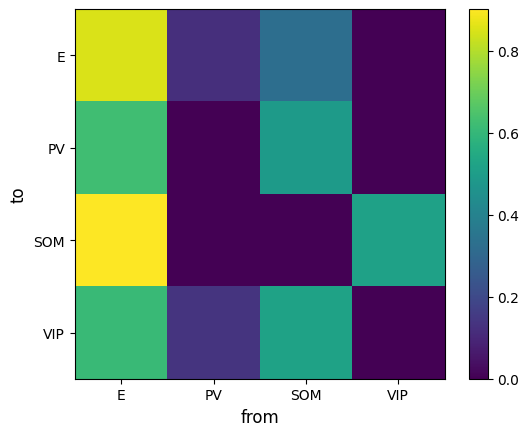

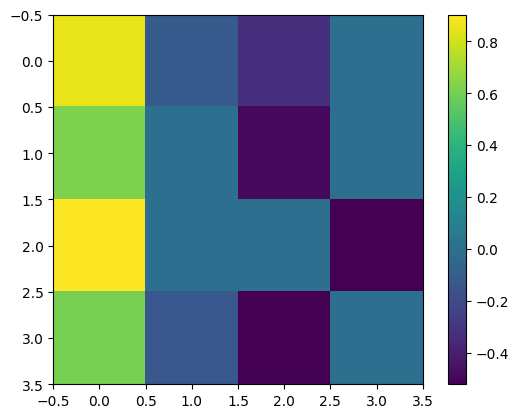

In [573]:
plt.imshow(weight_matrix[:,0:4])
plt.colorbar()

plt.xticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'], fontsize = 10)
plt.yticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'], fontsize = 10)
plt.xlabel('from', fontsize = 12)
plt.ylabel('to', fontsize = 12)
plt.show()
plt.imshow(weight_matrix_sign[:,0:4])
plt.colorbar()
plt.show()

In [599]:
rates_sim = get_rates(np.random.rand(4)*4, weight_matrix_sign, I[0,1]/100, delta_h = 0, taus = np.array([1,1,1,1]))
print(rates_sim)


rates_beginning:  [0.82458059 1.95536098 3.16762541 1.45415349 0.06       1.        ]
[0.24586639 0.25108271 0.10749092 0.49872916 0.06       1.        ]
[0.24586639 0.25108271 0.10749092 0.49872916 0.06       1.        ]


In [600]:
print(E_mean[2], PV_mean[2], SOM_mean[2], VIP_mean[2])

0.28256743371298093 0.29559430184778135 0.10869490475822832 0.5790785735965691


In [601]:
full_jacobian = get_jacobian(rates_sim[0:4], weight_matrix_sign[:,0:4], taus = np.array([1,1,1,1]))
print(full_jacobian)

[[-0.58193304 -0.05923482 -0.16018806  0.        ]
 [ 0.31474308 -1.         -0.246233    0.        ]
 [ 0.19401522  0.         -1.         -0.11080047]
 [ 0.6108915  -0.13421758 -0.5194324  -1.        ]]


In [593]:
evals_full_j = np.linalg.eigvals(full_jacobian)
print(evals_full_j)
print(np.linalg.det(-full_jacobian))
print(np.trace(-full_jacobian))

[-1.19034211 -0.95144941 -0.6894073  -0.7825191 ]
0.610981872217775
3.6137179229003906


In [594]:
jacobian_e_removed = get_minor_jacobian(full_jacobian, 0)
evals_e_removed = np.linalg.eigvals(jacobian_e_removed)
print(evals_e_removed)
print(np.linalg.det(-jacobian_e_removed))

[-1.26091193 -0.95443648 -0.78465159]
0.9442970719448214


In [595]:
jacobian_pv_removed = get_minor_jacobian(full_jacobian, 1)
evals_pv_removed = np.linalg.eigvals(jacobian_pv_removed)
print(evals_pv_removed)
print(np.linalg.det(-jacobian_pv_removed))


[-1.1816063  -0.65143196 -0.78067967]
0.6009173253295946


In [596]:
jacobian_som_removed = get_minor_jacobian(full_jacobian, 2)
evals_som_removed = np.linalg.eigvals(jacobian_som_removed)
print(evals_som_removed)
print(np.linalg.det(-jacobian_som_removed))

[-1.         -0.97174988 -0.64196804]
0.6238323685125496


In [583]:
jacobian_vip_removed = get_minor_jacobian(full_jacobian, 3)
evals_vip_removed = np.linalg.eigvals(jacobian_vip_removed)
print(evals_vip_removed)
print(np.linalg.det(-jacobian_vip_removed))


[-0.72552692+0.j         -0.92820306+0.07179983j -0.92820306-0.07179983j]
0.628825890180193


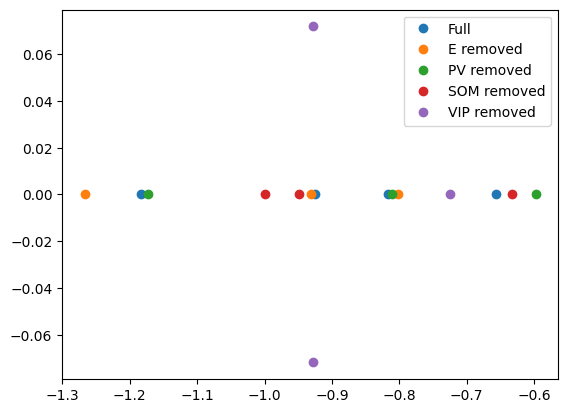

In [584]:
plt.plot(evals_full_j.real, evals_full_j.imag, 'o', label = 'Full')
plt.plot(evals_e_removed.real, evals_e_removed.imag, 'o', label = 'E removed')
plt.plot(evals_pv_removed.real, evals_pv_removed.imag, 'o', label = 'PV removed')
plt.plot(evals_som_removed.real, evals_som_removed.imag, 'o', label = 'SOM removed')
plt.plot(evals_vip_removed.real, evals_vip_removed.imag, 'o', label = 'VIP removed')
plt.legend()
plt.show()

In [203]:
weight_eval_full = np.linalg.eigvals(weight_matrix_sign[:,0:4])
print(weight_eval_full)
print(np.linalg.det(weight_matrix_sign[:,0:4]))

weight_eval_e_removed = np.linalg.eigvals(get_minor_jacobian(weight_matrix_sign[:,0:4], 0))
print(weight_eval_e_removed)
print(np.linalg.det(get_minor_jacobian(weight_matrix_sign[:,0:4], 0)))

weight_eval_pv_removed = np.linalg.eigvals(get_minor_jacobian(weight_matrix_sign[:,0:4], 1))
print(weight_eval_pv_removed)
print(np.linalg.det(get_minor_jacobian(weight_matrix_sign[:,0:4], 1)))

weight_eval_som_removed = np.linalg.eigvals(get_minor_jacobian(weight_matrix_sign[:,0:4], 2))
print(weight_eval_som_removed)
print(np.linalg.det(get_minor_jacobian(weight_matrix_sign[:,0:4], 2)))


[-0.32450583+0.j          0.50934324+0.25286005j  0.50934324-0.25286005j
  0.15601071+0.j        ]
-0.016370990545784822
[-0.57253001  0.13609224  0.43643776]
-0.034005873873634816
[-0.3169482 +0.j         0.58356979+0.2344482j  0.58356979-0.2344482j]
-0.125359245145422
[-0.          0.10074319  0.74944818]
0.0


## recalculate weights from steady state

In [237]:
rates_sim_0 = get_rates(np.random.rand(4), weight_matrix_sign, I[0,0]/100)
rates_sim_1 = get_rates(np.random.rand(4), weight_matrix_sign, I[0,1]/100)
rates_sim_2 = get_rates(np.random.rand(4), weight_matrix_sign, I[0,2]/100)
rates_sim_3 = get_rates(np.random.rand(4), weight_matrix_sign, I[0,3]/100)
rates_sim_4 = get_rates(np.random.rand(4), weight_matrix_sign, I[0,4]/100)
rates_sim_5 = get_rates(np.random.rand(4), weight_matrix_sign, I[0,5]/100)

[0.22284868 0.22016387 0.09609376 0.49309328 0.         1.        ]
[0.24586639 0.25108271 0.10749092 0.49872916 0.06       1.        ]
[0.27073395 0.2842977  0.12074504 0.5041939  0.12       1.        ]
[0.3311189  0.36361002 0.15732002 0.51456219 0.25       1.        ]
[0.46640541 0.53305069 0.26670714 0.51900787 0.5        1.        ]
[0.69174796 0.8177774  0.59081242 0.424244   1.         1.        ]


In [242]:
print(E_mean)
print(PV_mean)
print(SOM_mean)
print(VIP_mean)

[0.21634893 0.22840137 0.28256743 0.3946991  0.51465092 0.59149586]
[0.20270902 0.24957409 0.2955943  0.4072691  0.5950653  0.73559046]
[0.10236657 0.12339172 0.1086949  0.15047143 0.26108373 0.55200543]
[0.39859679 0.50254461 0.57907857 0.63834552 0.48090594 0.40052857]


In [238]:
#get vectors of rates for the 4 pop
rates_sim_E = [rates_sim_0[0], rates_sim_1[0], rates_sim_2[0], rates_sim_3[0], rates_sim_4[0], rates_sim_5[0]]
rates_sim_PV = [rates_sim_0[1], rates_sim_1[1], rates_sim_2[1], rates_sim_3[1], rates_sim_4[1], rates_sim_5[1]]
rates_sim_SOM = [rates_sim_0[2], rates_sim_1[2], rates_sim_2[2], rates_sim_3[2], rates_sim_4[2], rates_sim_5[2]]
rates_sim_VIP = [rates_sim_0[3], rates_sim_1[3], rates_sim_2[3], rates_sim_3[3], rates_sim_4[3], rates_sim_5[3]]


In [239]:
A = np.concatenate((E_mean[:,np.newaxis], -PV_mean[:,np.newaxis], -SOM_mean[:,np.newaxis], -VIP_mean[:,np.newaxis], I[0,:][:,np.newaxis]/100), axis = 1)
print(A.shape)
ones = np.ones_like(I)
print(ones.shape)
A = np.concatenate((A, ones[0,:][:,np.newaxis]), axis = 1)
print(A.shape)


(6, 5)
(1, 6)
(6, 6)


In [240]:
phi_inv_E = phi_inv(np.array(rates_sim_E))
#solve nnls Ax = y
x_E = nnls(A, phi_inv_E)[0]

phi_inv_PV = phi_inv(np.array(rates_sim_PV))
x_PV = nnls(A, phi_inv_PV)[0]

phi_inv_SOM = phi_inv(np.array(rates_sim_SOM))
Anc = A.copy()
Anc[:,-2] = 0
x_SOM = nnls(Anc, phi_inv_SOM)[0]

phi_inv_VIP = phi_inv(np.array(rates_sim_VIP))
x_VIP = nnls(Anc, phi_inv_VIP)[0]

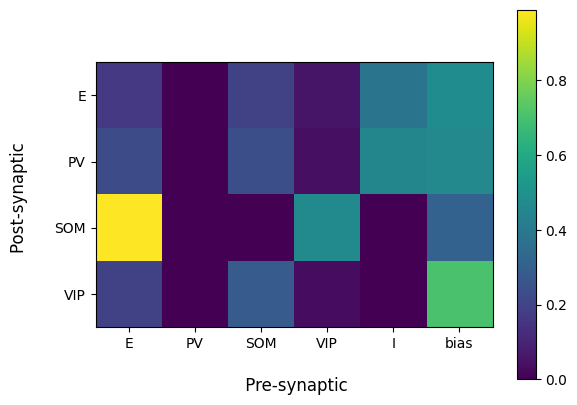

In [241]:
weight_sim_matrix = np.concatenate((x_E, x_PV, x_SOM, x_VIP))
weight_sim_matrix = weight_sim_matrix.reshape(4,6)
plt.imshow(weight_sim_matrix)
plt.xticks(np.arange(6), ['E', 'PV', 'SOM', 'VIP', 'I', 'bias'], fontsize = 10)
plt.yticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'], fontsize = 10)
plt.xlabel('\n Pre-synaptic', fontsize = 12)
plt.ylabel('Post-synaptic \n', fontsize = 12)
plt.colorbar()
plt.show()


In [602]:
weight_form_paper = np.array([[1, 0.5, -1, -2.5], [0.6, -0.8, -1, -2.5], [0.2, -3, -100, 0.2], [0.9, 0.2, -0.7, -100]])
weight_form_paper = np.exp(weight_form_paper)

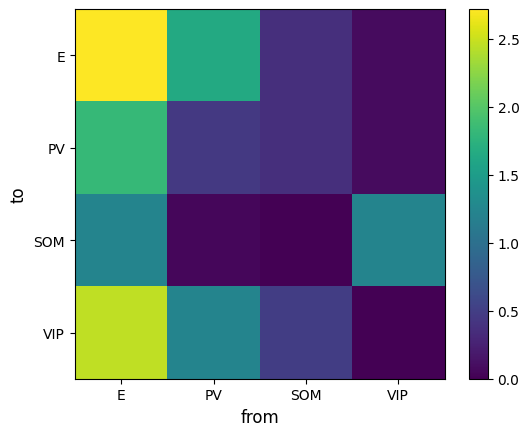

In [607]:
plt.imshow(weight_form_paper)
plt.colorbar()
plt.xticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'], fontsize = 10)
plt.yticks(np.arange(4), ['E', 'PV', 'SOM', 'VIP'], fontsize = 10)
plt.xlabel('from', fontsize = 12)
plt.ylabel('to', fontsize = 12)
plt.show()

In [604]:
weight_from_paper_sign = get_weight_matrix_sign(weight_form_paper)

In [605]:
rates_sim = get_rates(np.random.rand(4)*4, weight_matrix_sign, I[0,1]/100, delta_h = 0, taus =  np.array([3,0.2,0.5,0.3]))

full_jacobian = get_jacobian(rates_sim[0:4], weight_from_paper_sign[:,0:4], taus = np.array([3,0.2,0.5,0.3]))
print(full_jacobian)
evals_full_j = np.linalg.eigvals(full_jacobian)
print(evals_full_j)
print(np.linalg.det(-full_jacobian))
print(np.trace(-full_jacobian))


rates_beginning:  [1.35848783 0.42777331 3.56002946 0.24648823 0.06       1.        ]
[0.24586639 0.25108271 0.10749092 0.49872916 0.06       1.        ]
[[ 0.11222275 -0.27024343 -0.06029946 -0.01345463]
 [ 4.57502534 -6.12818736 -0.92368169 -0.20610124]
 [ 0.5251588  -0.02140663 -2.         -0.5251588 ]
 [ 8.17783866 -4.0609945  -1.65107715 -3.33333333]]
[-6.33453523 -0.09609711 -3.21355345 -1.70511216]
3.3355200110087933
11.349297940193436


[-6.55254172 -3.20569    -1.70328897]
35.77829596456394
[-3.75668835  0.10130365 -1.56572589]
-0.5958624257024149
[-0.09981036 -6.18568332 -3.06380426]
1.891578283123629
[-5.92285173 -0.09786995 -1.99524293]
1.1565809087610788


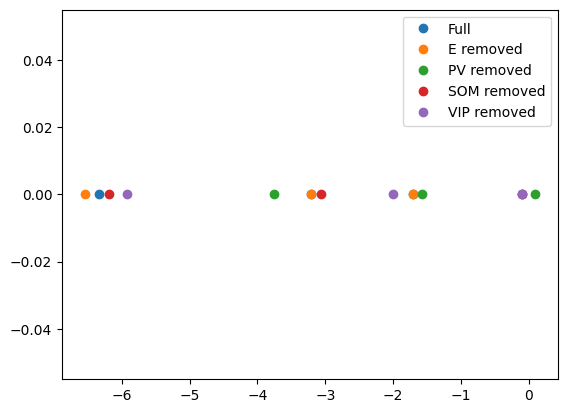

In [606]:
jacobian_e_removed = get_minor_jacobian(full_jacobian, 0)
evals_e_removed = np.linalg.eigvals(jacobian_e_removed)
print(evals_e_removed)
print(np.linalg.det(-jacobian_e_removed))
jacobian_pv_removed = get_minor_jacobian(full_jacobian, 1)
evals_pv_removed = np.linalg.eigvals(jacobian_pv_removed)
print(evals_pv_removed)
print(np.linalg.det(-jacobian_pv_removed))

jacobian_som_removed = get_minor_jacobian(full_jacobian, 2)
evals_som_removed = np.linalg.eigvals(jacobian_som_removed)
print(evals_som_removed)
print(np.linalg.det(-jacobian_som_removed))
jacobian_vip_removed = get_minor_jacobian(full_jacobian, 3)
evals_vip_removed = np.linalg.eigvals(jacobian_vip_removed)
print(evals_vip_removed)
print(np.linalg.det(-jacobian_vip_removed))

plt.plot(evals_full_j.real, evals_full_j.imag, 'o', label = 'Full')
plt.plot(evals_e_removed.real, evals_e_removed.imag, 'o', label = 'E removed')
plt.plot(evals_pv_removed.real, evals_pv_removed.imag, 'o', label = 'PV removed')
plt.plot(evals_som_removed.real, evals_som_removed.imag, 'o', label = 'SOM removed')
plt.plot(evals_vip_removed.real, evals_vip_removed.imag, 'o', label = 'VIP removed')
plt.legend()
plt.show()